<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/Lab_6/Lab6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [16]:
country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

#country= pd.DataFrame(country)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
#dictionary= pd.DataFrame(dictionary)
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [19]:
country.shape,dictionary.shape

((167, 10), (10, 2))

In [21]:
x = country.iloc[:, 1:10]
y = country.iloc[:, 0:1]
print(x.head())
print(y.head())

   child_mort  exports  health  ...  life_expec  total_fer   gdpp
0        90.2     10.0    7.58  ...        56.2       5.82    553
1        16.6     28.0    6.55  ...        76.3       1.65   4090
2        27.3     38.4    4.17  ...        76.5       2.89   4460
3       119.0     62.3    2.85  ...        60.1       6.16   3530
4        10.3     45.5    6.03  ...        76.8       2.13  12200

[5 rows x 9 columns]
               country
0          Afghanistan
1              Albania
2              Algeria
3               Angola
4  Antigua and Barbuda


In [23]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)
print(km.labels_)

[1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 0 2 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 1 2 1 1 2 2 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


In [24]:
y_pred=km.predict(x)
print(y_pred)

[1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 0 2 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 1 2 1 1 2 2 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


In [25]:
print("Completeness: %0.3f" % metrics.completeness_score(y['country'], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, km.labels_))

Completeness: 1.000
Silhouette Coefficient: 0.700


# 3 clusters based on Health and Income

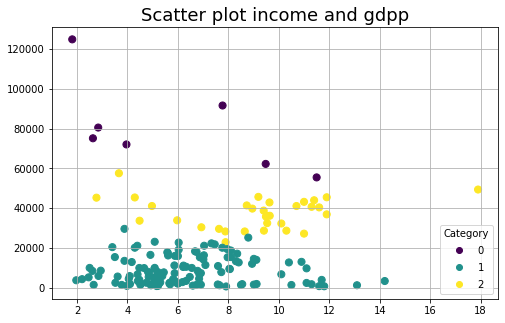

In [39]:
plt.figure(figsize=(8,5))
plt.title("Scatter plot income and gdpp", fontsize=18)
plt.grid(True)
scatter = plt.scatter(x['health'],x['income'], c=y_pred,s=50)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Category")
plt.show()

In [40]:
data = country.copy()
data['label'] = km.labels_
data[['label']] = data['label'].replace([1,2,0], ['under-developing country', 'developing country', 'developed country'])
data['label'].value_counts()

under-developing country    128
developing country           32
developed country             7
Name: label, dtype: int64

In [41]:
from google.colab import files
data.to_csv('country_result.csv') 
files.download('country_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>